In [128]:
import pandas as pd
import ssl
import numpy as np
ssl._create_default_https_context = ssl._create_unverified_context
df = pd.read_csv("https://raw.githubusercontent.com/cwhitz/git_intro_to_ml/master/heart.csv")
import math
from math import pi 
from math import e
from math import exp

In [110]:
from sklearn.utils import shuffle
df = shuffle(df)
y = df.target
X = df.drop("target",axis=1)
Xtrain= np.array(X.head(200))
Xtest = np.array(X.tail(103))
ytrain= np.array(y.head(200))
ytest = np.array(y.tail(103))

In [111]:
#input into desmos and adjust: \frac{1}{\sqrt{2\cdot\pi\cdot.2^{2}}}\exp\left(-\frac{\left(x-10\right)^{2}}{2\cdot.2^{2}}\right)

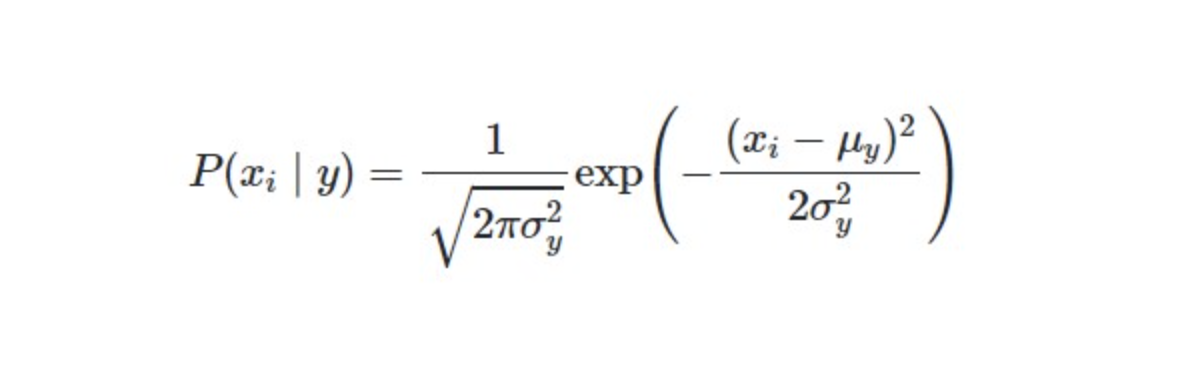

In [205]:
class Quantile:
    def continuous(self,col):
        Xvals = np.array(self.X)[:,col]
        return len(np.unique(Xvals))>3
    
    
    def quantile(self,col,x):
        np.array(self.X)[:,col]
        for q in [.25,.5,.75]:
            if x < np.quantile(Xvals,q):
                return [q-.25,q] #[greater than, smaller than]
            else:
                return [.75,1]
  
    def quantile_likelihood(self,col,x,h): 
        #likelihood of val (D) given h=f
        #get the X values that match h --> then count the percent that are that certain category
        
        Xvals = np.array(self.X)[self.y==h,col]
        if self.continuous(col): #quantiles instead of categorical
            quantiles = self.quantile(col,x)
            if quantiles[0] == 0:
                indx = Xvals<np.quantile(Xvals,quantiles[1])
            if quantiles[1] == 1:
                indx = Xvals>np.quantile(Xvals,quantiles[0])
            else:
                indx = np.logical_or(Xvals>np.quantile(Xvals,quantiles[0]), Xvals<np.quantile(Xvals,quantiles[1]))
            
            return np.count_nonzero(indx)/len(Xvals) 
        else:
            return np.count_nonzero(Xvals==x)/len(Xvals) 
            
class MultinomialB:
    def multinomailB_likelihood(self,col,x,h): #likelihood of val (D) given h=f
        Xvals = np.array(self.X)[self.y==h,col]
        return np.count_nonzero(Xvals==x)/len(Xvals)
    
class Guassian:
    def guassian_likelihood(self,col,x,h):
        Xvals = np.array(self.X)[self.y==h,col]  
        std = np.std(Xvals)
        mean = np.mean(Xvals)
        return (1/np.sqrt(2*pi*std))*exp(-(x-mean)**2/(2*(std**2)))
    

In [206]:
class Bayes(Guassian,Quantile):

    
    def fit(self,X,y):
        self.X = X
        self.y = y
    def posterior(self,x,h):
        prior = 1 #P(h=f)
        posterior = prior
        for col,xn in enumerate(x):
            posterior *= self.guassian_likelihood(col,xn,h)

            
        return posterior
    def predict(self,x):
        H = np.unique(self.y)
        maxProb = np.argmax([self.posterior(x,h) for h in H])
        finalHyp = H[maxProb]
        return finalHyp
    
    def calculate_preds(self,X):
        return [self.predict(x) for x in X]
    
    def Ein_error(self):
        preds = self.calculate_preds(self.X)
        return np.count_nonzero(preds!=self.y)/len(self.X)
    
    def score(self,X,y):
        preds = self.calculate_preds(X)
        return np.count_nonzero(preds!=y)/len(y)
            
        

In [207]:
test = Bayes()

In [208]:
test.fit(Xtrain,ytrain)

In [209]:
test.score(Xtest,ytest)

0.24271844660194175

In [204]:
test.Ein_error()

0.145

In [159]:
ytest

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0])

In [160]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(Xtrain, ytrain)

GaussianNB()

In [161]:
clf.score(Xtest,ytest)

0.7669902912621359

In [ ]:
#sigma is standard deviation
#mu is mean